Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0194 - val_loss: 0.0066
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0026 - val_loss: 0.0025


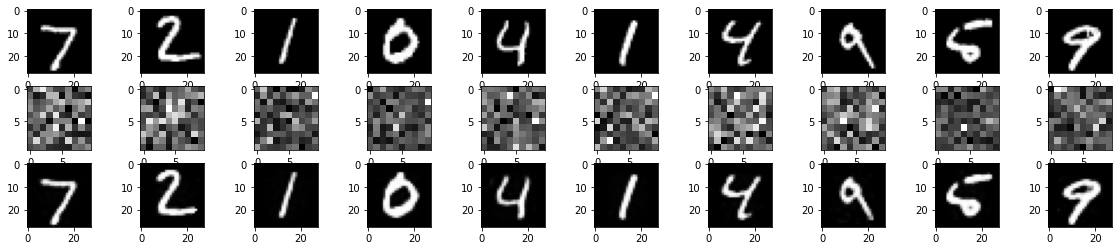

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

latent_dim = 100
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

autoencoder.fit(x_train, x_train, epochs=5, shuffle=True, validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(3, n, i+1)
  plt.imshow(x_test[i])
  plt.gray()

  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape(10, 10))
  plt.gray()

  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i])
  plt.gray()
plt.show()

In [9]:
import keras
from keras import layers, Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32

input_img = Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2783 - val_loss: 0.1929
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1711 - val_loss: 0.1521
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1434 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1286 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1110 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1058 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0974 - val_los

313/313 [==============================] - 0s 1ms/step


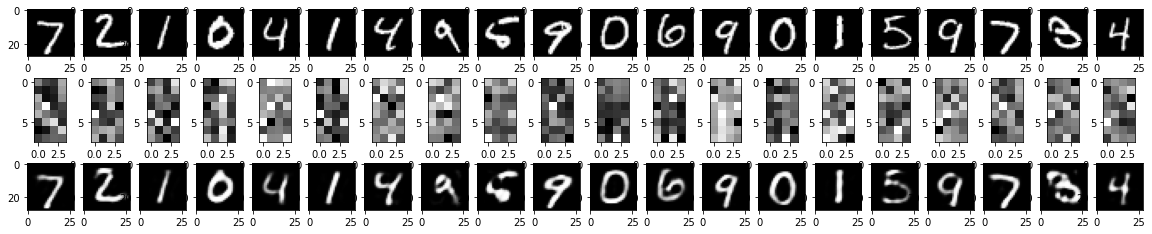

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.subplot(3, n, i+1)
  plt.imshow(x_test[i].reshape((28, 28)))
  plt.gray()

  plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape((8, 4)))
  plt.gray()

  plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
plt.show()